In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc # 폰트
#한글폰트 적용-----------------------------
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
#-----------------------------------------


from datetime import datetime
import time
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
# datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


C:\Users\monam\.conda\envs\basic\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\monam\.conda\envs\basic\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\monam\.conda\envs\basic\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [15]:
df = pd.read_excel(r'C:\Users\monam\Desktop\dataitgirls 6\확률과 통계와 실험/today_score_data.xlsx')
df

,cnt,name,today_score,date,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,...,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_range,getup_range,gotobed_late,getup_early
0,1,quokka,9,2022-09-28,4,0,20.4,16.1,26.1,0.0,...,70,11772,0,0,0,2,03시대,08시대,1,0
1,2,quokka,6,2022-09-29,5,0,20.4,16.4,26.5,0.0,...,0,5800,0,0,0,3,03시대,08시대,1,0
2,3,quokka,4,2022-09-30,6,0,20.7,14.8,27.7,0.0,...,0,2775,0,0,0,4,05시대,10시대,1,0
3,4,quokka,7,2022-10-01,7,1,20.9,14.4,27.6,0.0,...,0,4365,0,0,0,3,05시대,07시대,1,1
4,5,quokka,7,2022-10-02,1,1,19.4,17.2,21.6,15.8,...,0,13541,0,0,1,4,03시대,10시대,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,236,rabbit,7,2022-11-10,5,0,13.5,8.8,19.1,0.0,...,0,2800,0,0,1,3,00시대,07시대,0,1
236,237,rabbit,8,2022-11-11,6,0,15.6,10.9,22.1,0.0,...,0,5503,0,0,1,4,01시대,10시대,0,0
237,238,rabbit,9,2022-11-12,7,1,16.3,11.6,22.0,57.9,...,0,4261,0,0,1,3,20시대,10시대,0,0
238,239,rabbit,9,2022-11-13,1,1,10.3,8.7,17.3,0.0,...,0,7500,0,0,1,4,02시대,08시대,1,0


In [16]:
df = df[df.name == 'quokka']

In [17]:
# 날짜 직관적으로 바꿔주기!
dayofweek = ['일', '월', '화', '수', '목', '금', '토']
for i, day in zip(range(1,8), dayofweek):
        df['dayofweek'].loc[df.dayofweek == i] = day

In [18]:
df

,cnt,name,today_score,date,dayofweek,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,...,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_range,getup_range,gotobed_late,getup_early
0,1,quokka,9,2022-09-28,수,0,20.4,16.1,26.1,0.00,...,70,11772,0,0,0,2,03시대,08시대,1,0
1,2,quokka,6,2022-09-29,목,0,20.4,16.4,26.5,0.00,...,0,5800,0,0,0,3,03시대,08시대,1,0
2,3,quokka,4,2022-09-30,금,0,20.7,14.8,27.7,0.00,...,0,2775,0,0,0,4,05시대,10시대,1,0
3,4,quokka,7,2022-10-01,토,1,20.9,14.4,27.6,0.00,...,0,4365,0,0,0,3,05시대,07시대,1,1
4,5,quokka,7,2022-10-02,일,1,19.4,17.2,21.6,15.80,...,0,13541,0,0,1,4,03시대,10시대,1,0
5,6,quokka,8,2022-10-03,월,0,21.4,17.5,23.4,76.00,...,0,750,0,0,0,3,02시대,11시대,1,0
6,7,quokka,6,2022-10-04,화,0,17.9,14.2,23.0,11.80,...,0,5744,0,0,0,2,04시대,09시대,1,0
7,8,quokka,8,2022-10-05,수,0,16.6,14.1,21.6,0.10,...,0,293,0,0,0,4,03시대,09시대,1,0
8,9,quokka,5,2022-10-06,목,0,15.8,12.7,19.1,0.01,...,40,9884,0,0,1,4,04시대,09시대,1,0
9,10,quokka,8,2022-10-07,금,0,14.3,11.0,18.6,0.00,...,0,251,0,1,0,4,01시대,09시대,0,0


Text(0.5, 1.0, 'qoukka 의 오늘의 점수 plot')

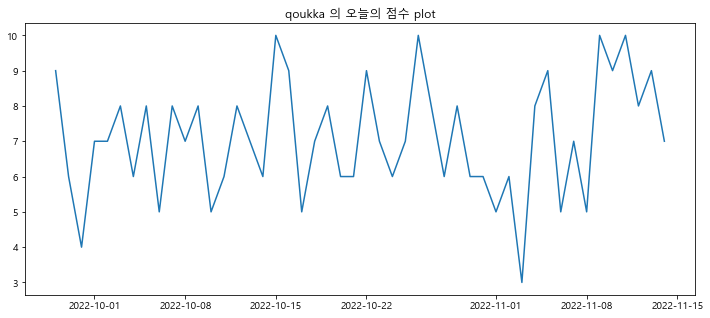

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df.date, df.today_score)
plt.title('qoukka 의 오늘의 점수 plot')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   cnt                      48 non-null     int64         
 1   name                     48 non-null     object        
 2   today_score              48 non-null     int64         
 3   date                     48 non-null     datetime64[ns]
 4   dayofweek                48 non-null     object        
 5   dayofweek_check          48 non-null     int64         
 6   avg_temp                 48 non-null     float64       
 7   low_temp                 48 non-null     float64       
 8   high_temp                48 non-null     float64       
 9   precipitation            48 non-null     float64       
 10  precipitation_check      48 non-null     int64         
 11  class_check              48 non-null     int64         
 12  gotobed_time             48 non-null  

In [20]:
df.describe()

,cnt,today_score,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,precipitation_check,class_check,sleep_time,...,sleep_score,yesterday_exercise,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_late,getup_early
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,24.50,7.083333,0.291667,13.929167,9.595833,19.250000,3.792500,0.208333,0.750000,402.020833,...,3.125000,0.187500,10.770833,6856.125000,0.104167,0.187500,0.375000,3.458333,0.687500,0.187500
std,14.00,1.660983,0.459340,3.762636,3.929591,4.017197,14.023592,0.410414,0.437595,132.918867,...,1.122782,0.394443,23.210635,4384.607931,0.308709,0.394443,0.489246,0.944375,0.468417,0.394443
min,1.00,3.000000,0.000000,4.900000,0.800000,9.800000,0.000000,0.000000,0.000000,107.000000,...,1.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,12.75,6.000000,0.000000,11.175000,6.650000,16.550000,0.000000,0.000000,0.750000,307.250000,...,2.000000,0.000000,0.000000,4267.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,24.50,7.000000,0.000000,13.550000,9.550000,19.100000,0.000000,0.000000,1.000000,378.500000,...,3.000000,0.000000,0.000000,7109.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000
75%,36.25,8.000000,1.000000,16.300000,11.800000,21.600000,0.000000,0.000000,1.000000,462.500000,...,4.000000,0.000000,0.000000,9591.500000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000
max,48.00,10.000000,1.000000,21.400000,17.500000,27.700000,76.000000,1.000000,1.000000,850.000000,...,5.000000,1.000000,78.000000,18177.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000


In [30]:
categorical = [col for col in df.columns if df[col].dtypes == 'object']

In [31]:
categorical

['name',
 'dayofweek',
 'gotobed_time',
 'getup_time',
 'gotobed_range',
 'getup_range']

In [78]:
# max값이 1인 것.. 0과 1로 구성한 카테고리컬이 아닐까
categorical2 = [col for col in df.columns if df[col].max() == 1]

In [81]:
categorical = categorical + categorical2

In [85]:
categorical.remove('name')
categorical.remove('getup_time')
categorical.remove('gotobed_time')

In [86]:
categorical

['dayofweek',
 'gotobed_range',
 'getup_range',
 'dayofweek_check',
 'precipitation_check',
 'class_check',
 'morning_routine',
 'weather_prefer',
 'yesterday_exercise',
 'yesterday_drinking',
 'period',
 'caffeine',
 'gotobed_late',
 'getup_early']

# 범주형 변수 분포 알아보기

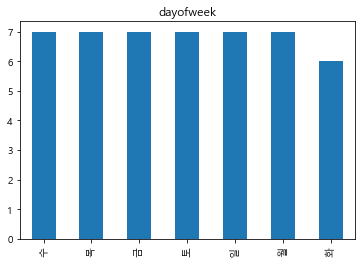

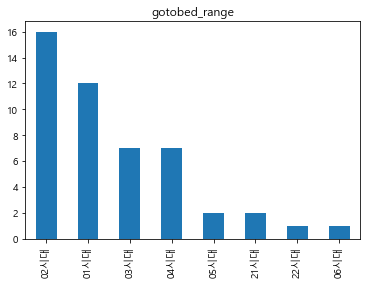

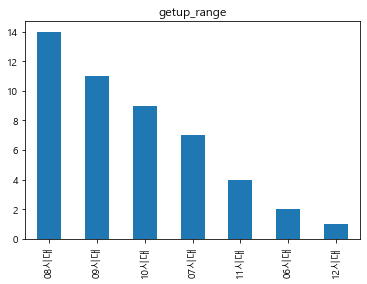

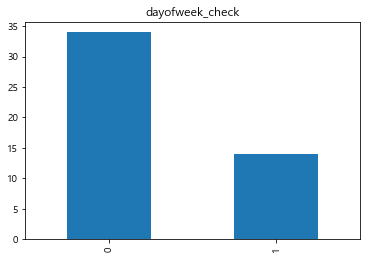

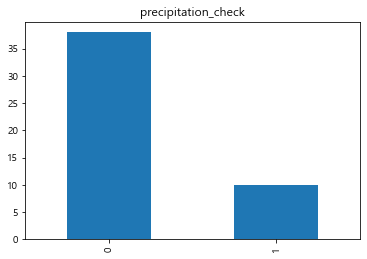

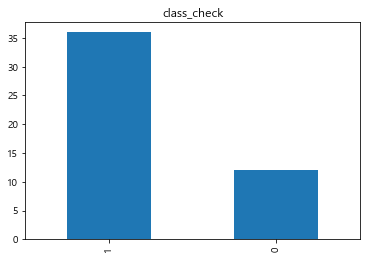

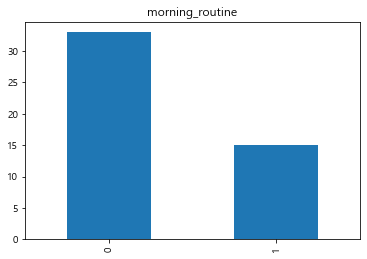

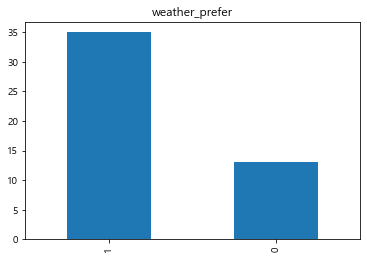

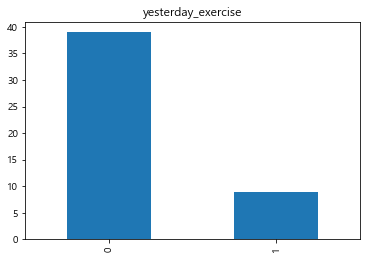

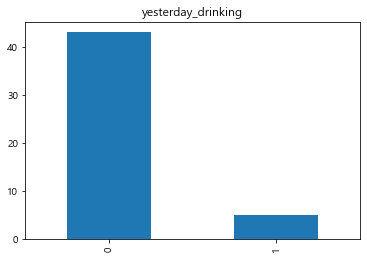

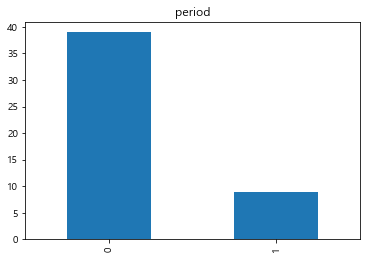

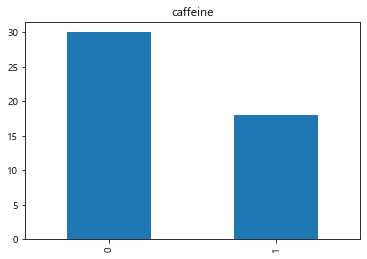

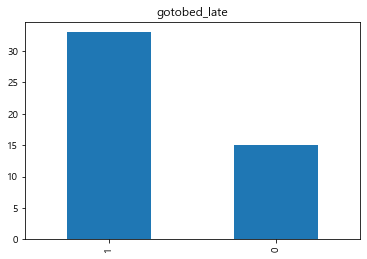

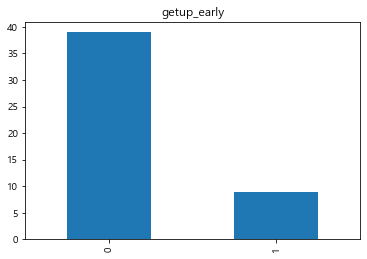

In [87]:
for col in categorical:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

quokka 특징:

- 주로 잠드는 시간대: 2시대
- 주로 일어난 시간대: 8시대
- 모닝루틴은.. 안 한 날이 한 날의 두 배 정도
- 운동을 안 한 날이 한 날의 3.5배 정도
- 음주는 거의 안 함 5회 미만으로 보임
- 아침에 커피를 안 마시는 날은 마시는 날의 두 배 정도
- 다른 팀원에 비해 비교적 늦게 자는 날이 많음
- 다른 팀원에 비해 비교적 늦게 일어나는 날이 많음

In [92]:
numerical = [col for col in df.columns if (df[col].dtypes == 'int64')|(df[col].dtypes == 'float64')]
numerical2 = [col for col in df.columns if (df[col].dtypes == 'object') | (df[col].max() != 1)]

In [95]:
numerical = numerical + numerical2

In [99]:
numerical

['dayofweek_check',
 'avg_temp',
 'low_temp',
 'high_temp',
 'precipitation',
 'precipitation_check',
 'class_check',
 'sleep_time',
 'morning_routine',
 'weather_prefer',
 'sleep_score',
 'yesterday_exercise',
 'yesterday_exercise_time',
 'yesterday_step_cnt',
 'yesterday_drinking',
 'period',
 'caffeine',
 'yesterday_satisfaction',
 'gotobed_late',
 'getup_early',
 'today_score',
 'avg_temp',
 'low_temp',
 'high_temp',
 'precipitation',
 'sleep_time',
 'sleep_score',
 'yesterday_exercise_time',
 'yesterday_step_cnt',
 'yesterday_satisfaction',
 'gotobed_range',
 'getup_range']

In [96]:
numerical.remove('cnt')
numerical.remove('name')
numerical.remove('date')
numerical.remove('today_score')
numerical.remove('dayofweek')
numerical.remove('gotobed_time')
numerical.remove('getup_time')

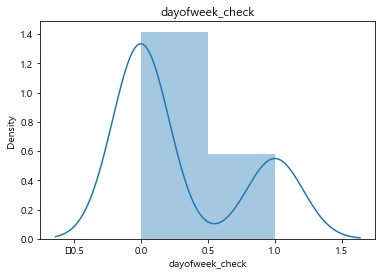

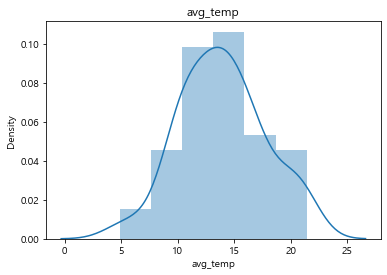

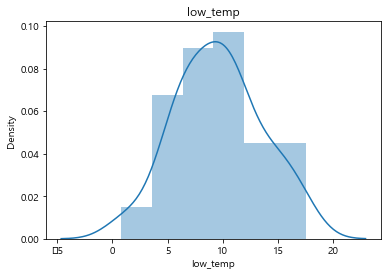

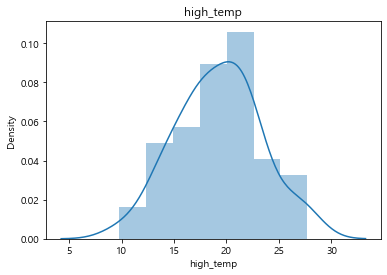

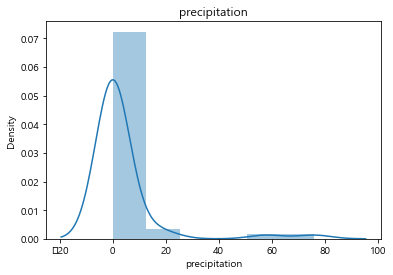

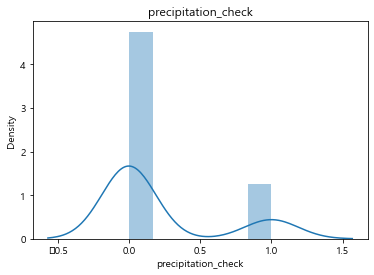

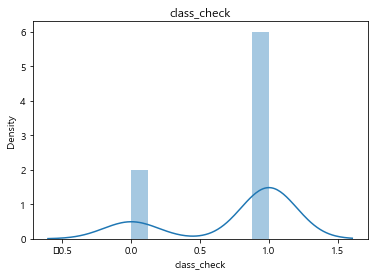

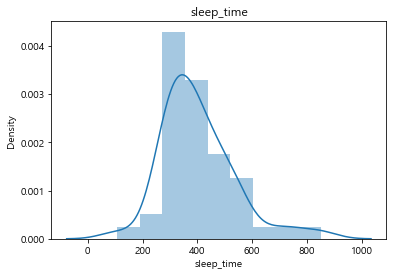

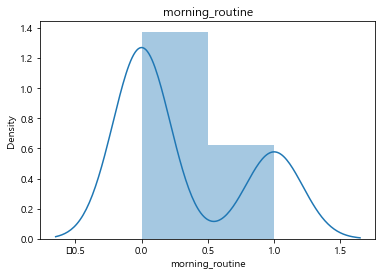

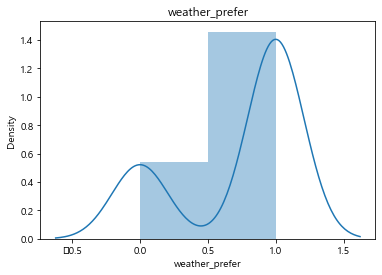

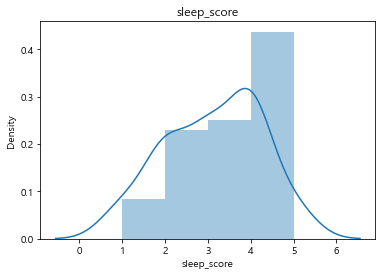

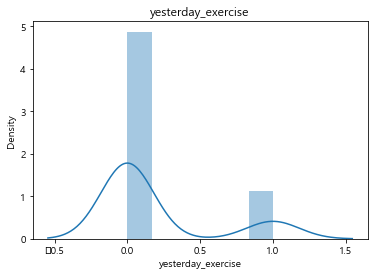

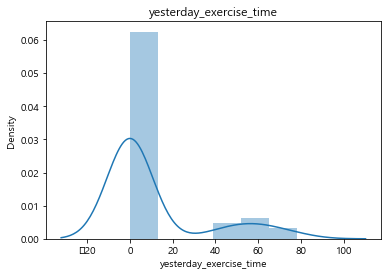

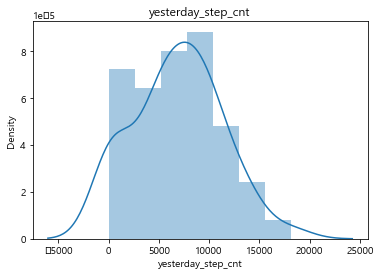

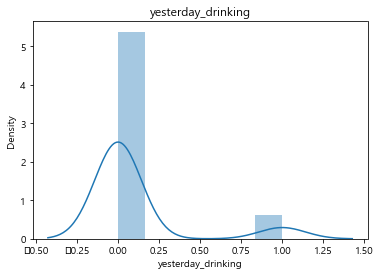

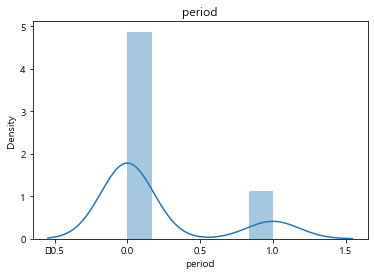

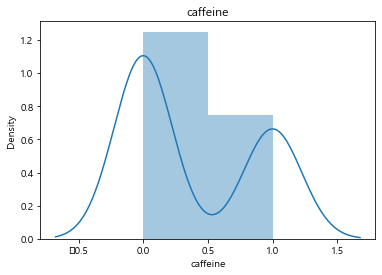

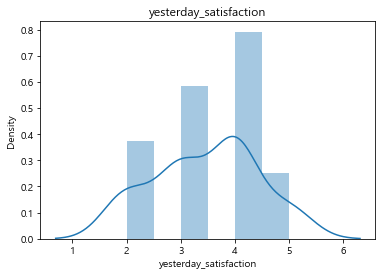

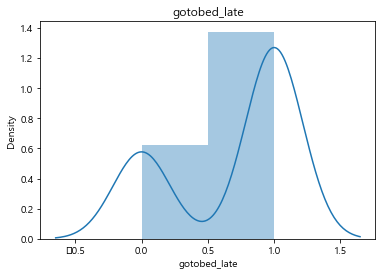

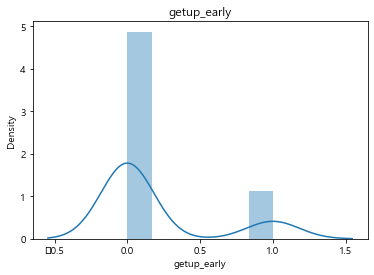

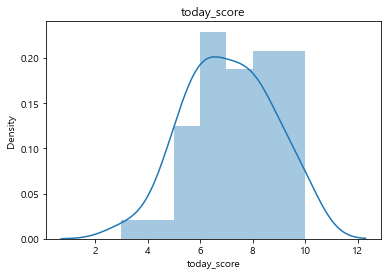

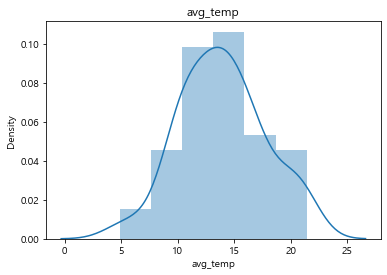

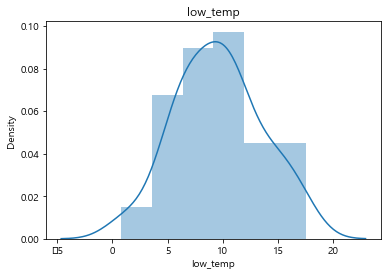

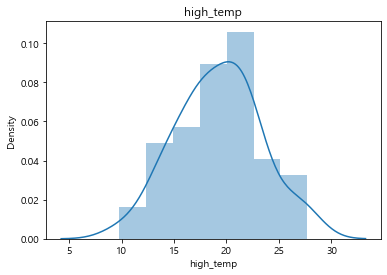

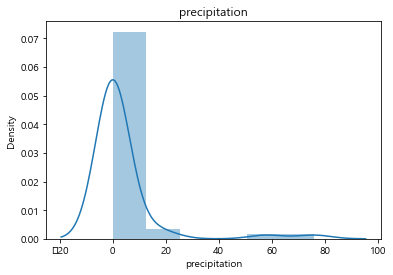

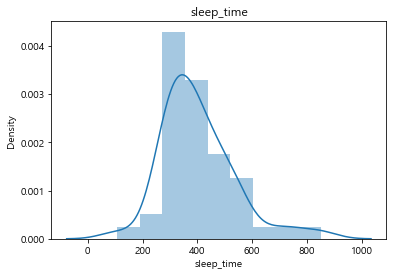

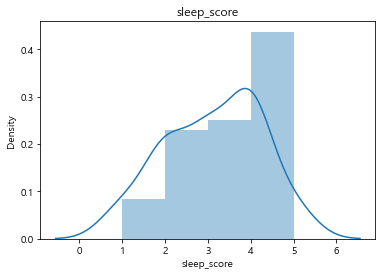

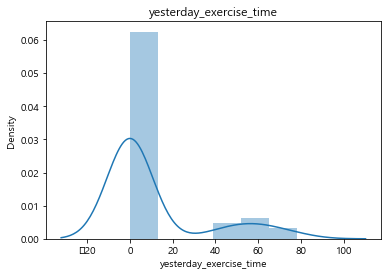

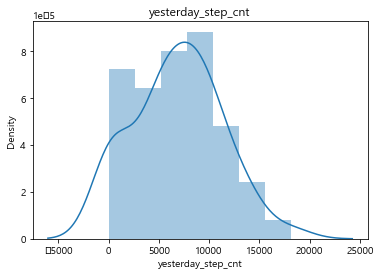

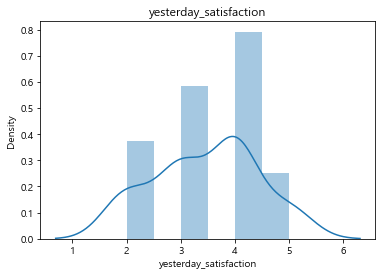

ValueError: could not convert string to float: '03시대'

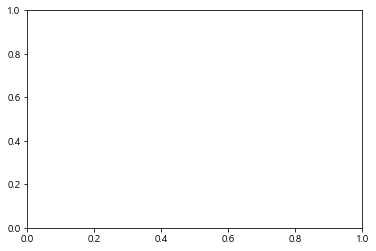

In [98]:
for col in numerical:
    sns.distplot(df.loc[df[col].notnull(), col])
    plt.title(col)
    plt.show()

quokka 특징:
- 잠 자는 시간은 3-400분대, 약 6시간 ~ 6시간 반 정도 잠
- 수면 점수는 4점대에 많이 분포하지만, 5점은 적음
- 운동하면 40분 ~ 80분 정도
- 걸음 수는 8천 보 정도
- 어제의 만족도는 3~4점 정도
- 오늘 점수는 6점에 가장 많이 분포


## 상관관계 분석

In [101]:
df.corr()

,cnt,today_score,dayofweek_check,avg_temp,low_temp,high_temp,precipitation,precipitation_check,class_check,sleep_time,...,sleep_score,yesterday_exercise,yesterday_exercise_time,yesterday_step_cnt,yesterday_drinking,period,caffeine,yesterday_satisfaction,gotobed_late,getup_early
cnt,1.000000,0.139991,0.046320,-0.635629,-0.632331,-0.502588,-0.101043,-0.225882,-0.083351,0.180052,...,0.173256,0.090544,0.080504,0.317077,0.287992,-0.364101,0.037276,0.061152,-0.306601,0.163749
today_score,0.139991,1.000000,0.274223,0.067351,0.050255,0.088965,0.116326,-0.182067,-0.117091,0.432027,...,0.405014,0.170495,0.246095,0.229529,0.190182,0.040594,-0.039274,0.354928,-0.239283,0.235446
dayofweek_check,0.046320,0.274223,1.000000,0.132851,0.153925,0.138365,0.135440,0.009405,-0.476331,0.179019,...,0.299096,0.044037,0.098202,0.236926,0.081274,0.044037,0.165683,0.126708,0.037082,0.044037
avg_temp,-0.635629,0.067351,0.132851,1.000000,0.942816,0.931777,0.331296,0.162696,-0.140206,-0.145790,...,-0.078945,0.169702,0.190593,-0.035859,0.032132,0.056448,-0.159789,0.053640,0.333638,-0.048205
low_temp,-0.632331,0.050255,0.153925,0.942816,1.000000,0.793192,0.352950,0.289469,-0.236947,-0.127643,...,-0.126225,0.133665,0.147489,-0.030484,0.026674,0.058168,-0.088812,0.058433,0.374946,-0.110673
high_temp,-0.502588,0.088965,0.138365,0.931777,0.793192,1.000000,0.173421,-0.069687,-0.016945,-0.167350,...,-0.033492,0.173886,0.204331,-0.015912,0.031740,0.006042,-0.245741,0.065057,0.264018,-0.016784
precipitation,-0.101043,0.116326,0.135440,0.331296,0.352950,0.173421,1.000000,0.532758,-0.432005,0.198145,...,0.182836,0.091459,0.091374,-0.010018,0.191364,-0.052783,-0.099344,0.031079,0.184193,-0.131289
precipitation_check,-0.225882,-0.182067,0.009405,0.162696,0.289469,-0.069687,0.532758,1.000000,-0.296174,0.033461,...,-0.196234,0.016429,-0.021684,-0.069963,-0.006997,0.016429,0.132453,-0.141813,0.124509,-0.246432
class_check,-0.083351,-0.117091,-0.476331,-0.140206,-0.236947,-0.016945,-0.432005,-0.296174,1.000000,-0.092456,...,0.021652,0.030817,0.044515,-0.276392,-0.433125,0.030817,-0.049690,-0.231685,-0.181650,0.030817
sleep_time,0.180052,0.432027,0.179019,-0.145790,-0.127643,-0.167350,0.198145,0.033461,-0.092456,1.000000,...,0.506524,-0.093008,-0.036467,0.185264,0.186095,-0.054050,0.106211,0.257394,-0.373745,-0.149011


<AxesSubplot:>

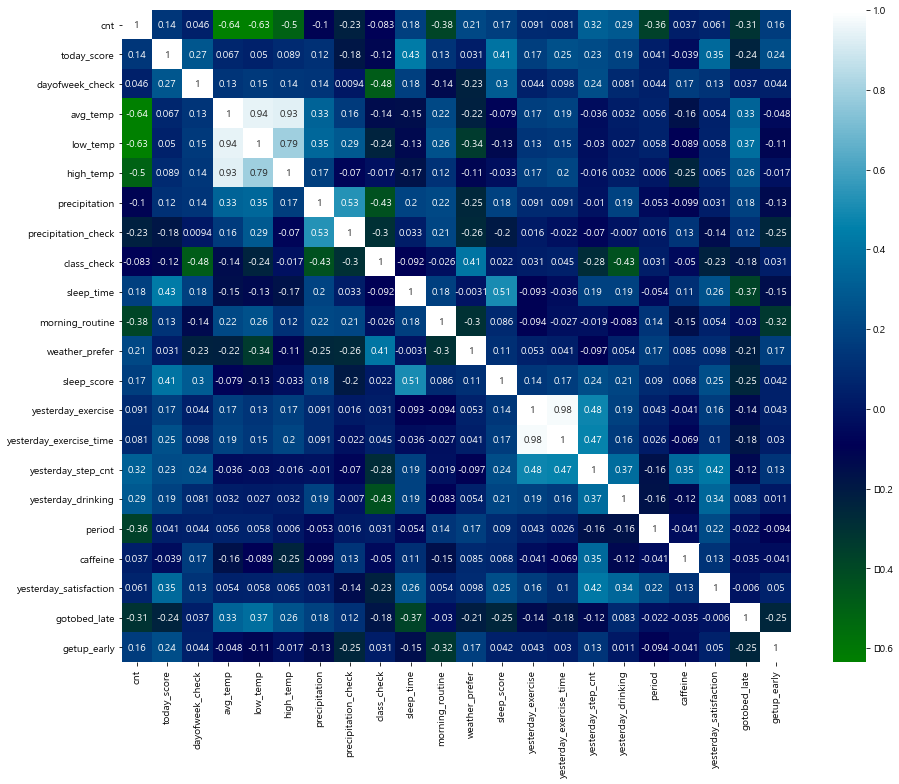

In [108]:
plt.figure(figsize=(15,12))
sns.heatmap(data=df.corr(),annot=True, cmap='ocean')

큰 상관관계를 보이는 변수
- sleep_time, today_score (0.41)
- yesterday_satisfaction, today_score (0.35)
- sleep_score, sleep_time (0.51)
- gotobed_late, sleep_time (-0.37)
- yesterday_excercise, yesterday_excercise_time (0.98) ㅋㅋ
- yesterday_excercise, yesterday_step_cnt (0.48)
- yesterday_step_cnt, yesterday_drinking (0.37) -> 술을 마시면 많이 걷는다??????
- yesterday_step_cnt, yesterday_satisfaction (0.42)
- getup_early, sleep_time (-0.32)

In [113]:
# 이제와서 범주형 변수 object 타입으로 변경
df['dayofweek'] = df['dayofweek'].astype(object)
df['dayofweek_check'] = df['dayofweek_check'].astype(object)
df['class_check'] = df['class_check'].astype(object)
df['morning_routine'] = df['morning_routine'].astype(object)
df['weather_prefer'] = df['weather_prefer'].astype(object)
df['yesterday_exercise'] = df['yesterday_exercise'].astype(object)
df['yesterday_drinking'] = df['yesterday_drinking'].astype(object)
df['period'] = df['period'].astype(object)
df['caffeine'] = df['caffeine'].astype(object)
df['precipitation_check'] = df['precipitation_check'].astype(object)
df['gotobed_late'] = df['gotobed_late'].astype(object)
df['getup_early'] = df['getup_early'].astype(object)

# 회귀 분석

In [112]:
df.columns

Index(['cnt', 'name', 'today_score', 'date', 'dayofweek', 'dayofweek_check',
       'avg_temp', 'low_temp', 'high_temp', 'precipitation',
       'precipitation_check', 'class_check', 'gotobed_time', 'getup_time',
       'sleep_time', 'morning_routine', 'weather_prefer', 'sleep_score',
       'yesterday_exercise', 'yesterday_exercise_time', 'yesterday_step_cnt',
       'yesterday_drinking', 'period', 'caffeine', 'yesterday_satisfaction',
       'gotobed_range', 'getup_range', 'gotobed_late', 'getup_early'],
      dtype='object')

날짜 관련: dayofweek

날씨 관련: avg_temp + percipitation + percifitation_check

잠 관련: sleep_time

gotobed_range + getup_range

수업: class_check

모닝루틴: morning_routine

수면 점수: sleep_score

## 요일별 분석

가설: 주말에 오늘의 점수가 높을 것이다

- p-value가 0.05보다 작은 값은 없음

In [143]:
m = ols('today_score ~ C(dayofweek)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     2.981
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0165
Time:                        00:44:02   Log-Likelihood:                -83.272
No. Observations:                  48   AIC:                             180.5
Df Residuals:                      41   BIC:                             193.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.8571      0.561     12.226      0.000       5.724       7.990
C(dayofweek)[T.목]    -0.5714      0.793     -0.720      0.475      -2.173       1.030
C(dayofweek)[T.수]     1.5714      0.793      1.981      0.054      -0.030       3.173
C(dayofweek)[T.월]    -0.5714      0.793     -0.720      0.475      -2.173       1.030
C(dayofweek)[T.일]     0.4286      0.793      0.540      0.592      -1.173       2.030
C(dayofweek)[T.토]     1.4286      0.793      1.801      0.079      -0.173       3.030
C(dayofweek)[T.화]    -0.8571      0.826     -1.038      0.305      -2.524       0.810
==============================================================================
Omnibus:                        0.091   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.122
Skew:                          -0.087   Prob(JB):                        0.941
Kurtosis:                       2.825   Cond. No.                         7.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 수면 시간

- 수면 시간이 길수록 오늘의 점수가 높을 것이다

- 굉장히 유의한 p-value를 보임
- 모델 설명력은 18.7%
- 1분 더 잘 수록 0.0054점 증가

In [117]:
m = ols('today_score ~ sleep_time', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     10.56
Date:                Fri, 25 Nov 2022   Prob (F-statistic):            0.00217
Time:                        00:03:37   Log-Likelihood:                -87.001
No. Observations:                  48   AIC:                             178.0
Df Residuals:                      46   BIC:                             181.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9129      0.703      6.990      0.000       3.498       6.328
sleep_time     0.0054      0.002      3.249      0.002       0.002       0.009
==============================================================================
Omnibus:                        0.641   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.125
Skew:                          -0.009   Prob(JB):                        0.939
Kurtosis:                       3.249   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 수면 시간대

- 수면 시간대가 늦을수록 점수가 낮을 것이다

- 귀무가설 채택

In [142]:
m = ols('today_score ~ C(gotobed_range)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     2.336
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0426
Time:                        00:43:33   Log-Likelihood:                -83.735
No. Observations:                  48   AIC:                             183.5
Df Residuals:                      40   BIC:                             198.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    7.2500      0.438     16.556      0.000       6.365       8.135
C(gotobed_range)[T.02시대]     0.1875      0.579      0.324      0.748      -0.983       1.358
C(gotobed_range)[T.03시대]    -0.2500      0.721     -0.347      0.731      -1.708       1.208
C(gotobed_range)[T.04시대]    -1.3929      0.721     -1.931      0.061      -2.851       0.065
C(gotobed_range)[T.05시대]    -1.7500      1.159     -1.510      0.139      -4.092       0.592
C(gotobed_range)[T.06시대]    -2.2500      1.579     -1.425      0.162      -5.441       0.941
C(gotobed_range)[T.21시대]     2.2500      1.159      1.942      0.059      -0.092       4.592
C(gotobed_range)[T.22시대]     1.7500      1.579      1.108      0.274      -1.441       4.941
==============================================================================
Omnibus:                        2.035   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.362   Jarque-Bera (JB):                1.134
Skew:                          -0.248   Prob(JB):                        0.567
Kurtosis:                       3.566   Cond. No.                         8.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 일어난 시간대
- 일찍 일어날수록 오늘의 점수가 낮을 것이다
- 귀무가설 채택

In [140]:
m = ols('today_score ~ C(getup_range)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.627
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.164
Time:                        00:43:12   Log-Likelihood:                -86.834
No. Observations:                  48   AIC:                             187.7
Df Residuals:                      41   BIC:                             200.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.0000      1.130      7.079      0.000       5.718      10.282
C(getup_range)[T.07시대]    -0.1429      1.281     -0.111      0.912      -2.731       2.445
C(getup_range)[T.08시대]    -1.2143      1.208     -1.005      0.321      -3.654       1.226
C(getup_range)[T.09시대]    -1.3636      1.229     -1.110      0.274      -3.845       1.118
C(getup_range)[T.10시대]    -1.5556      1.249     -1.245      0.220      -4.079       0.968
C(getup_range)[T.11시대]     0.7500      1.384      0.542      0.591      -2.045       3.545
C(getup_range)[T.12시대]  -9.12e-16      1.957  -4.66e-16      1.000      -3.953       3.953
==============================================================================
Omnibus:                        0.194   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.350
Skew:                           0.126   Prob(JB):                        0.839
Kurtosis:                       2.666   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 모닝 루틴

- 모닝루틴을 했을 때 오늘의 점수가 높을 것이다

- 귀무가설 채택


In [139]:
m = ols('today_score ~ C(morning_routine)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.7895
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.379
Time:                        00:43:01   Log-Likelihood:                -91.551
No. Observations:                  48   AIC:                             187.1
Df Residuals:                      46   BIC:                             190.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.9394      0.290     23.946      0.000       6.356       7.523
C(morning_routine)[T.1]     0.4606      0.518      0.889      0.379      -0.583       1.504
==============================================================================
Omnibus:                        0.256   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.880   Jarque-Bera (JB):                0.449
Skew:                          -0.026   Prob(JB):                        0.799
Kurtosis:                       2.529   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 수면 점수

- 수면 점수가 높을수록 오늘의 점수가 높을 것이다

- 굉장히 유의한 p-value를 보임
- 모델 설명력은 16.4%
- 수면점수 1점당 0.59점 증가

In [121]:
m = ols('today_score ~ sleep_score', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     9.026
Date:                Fri, 25 Nov 2022   Prob (F-statistic):            0.00430
Time:                        00:03:40   Log-Likelihood:                -87.659
No. Observations:                  48   AIC:                             179.3
Df Residuals:                      46   BIC:                             183.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.2110      0.661      7.878      0.000       3.880       6.542
sleep_score     0.5992      0.199      3.004      0.004       0.198       1.001
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.299
Skew:                           0.338   Prob(JB):                        0.522
Kurtosis:                       2.562   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 전날 운동
- 전날 운동 하고, 그 시간이 길 수록 오늘 점수가 좋을 것이다

- 귀무가설 채택.. 🥲
- 나는 나를 믿었는데...

In [138]:
m = ols('today_score ~ C(yesterday_exercise)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.377
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.247
Time:                        00:42:37   Log-Likelihood:                -91.251
No. Observations:                  48   AIC:                             186.5
Df Residuals:                      46   BIC:                             190.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      6.9487      0.265     26.231      0.000       6.415       7.482
C(yesterday_exercise)[T.1]     0.7179      0.612      1.174      0.247      -0.514       1.949
==============================================================================
Omnibus:                        0.393   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.822   Jarque-Bera (JB):                0.557
Skew:                          -0.093   Prob(JB):                        0.757
Kurtosis:                       2.506   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
m = ols('today_score ~ yesterday_exercise_time', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     2.965
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0918
Time:                        00:21:40   Log-Likelihood:                -90.460
No. Observations:                  48   AIC:                             184.9
Df Residuals:                      46   BIC:                             188.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.8936      0.259     26.573      0.000       6.371       7.416
yesterday_exercise_time     0.0176      0.010      1.722      0.092      -0.003       0.038
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.350
Skew:                          -0.063   Prob(JB):                        0.839
Kurtosis:                       2.601   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 전날 걸음수
- 전날 많이 걸을수록 오늘 나의 점수가 좋을 것이다

- 귀무가설 채택

In [125]:
m = ols('today_score ~ yesterday_step_cnt', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.558
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.117
Time:                        00:22:48   Log-Likelihood:                -90.661
No. Observations:                  48   AIC:                             185.3
Df Residuals:                      46   BIC:                             189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.4872      0.441     14.708      0.000       5.599       7.375
yesterday_step_cnt  8.695e-05   5.44e-05      1.599      0.117   -2.25e-05       0.000
==============================================================================
Omnibus:                        0.727   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.796
Skew:                          -0.149   Prob(JB):                        0.672
Kurtosis:                       2.444   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 전날 만족도
- 어제 기분이 좋으면 오늘 나의 점수도 높을 것이다

- 모델 설명력 12%

In [127]:
m = ols('today_score ~ yesterday_satisfaction', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     6.630
Date:                Fri, 25 Nov 2022   Prob (F-statistic):             0.0133
Time:                        00:28:49   Log-Likelihood:                -88.728
No. Observations:                  48   AIC:                             181.5
Df Residuals:                      46   BIC:                             185.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.9245      0.869      5.670      0.000       3.176       6.673
yesterday_satisfaction     0.6243      0.242      2.575      0.013       0.136       1.112
==============================================================================
Omnibus:                        0.292   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.477
Skew:                          -0.019   Prob(JB):                        0.788
Kurtosis:                       2.513   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 날씨 관련
- 날씨를 선호하면 오늘 점수가 높을 것이다

- 귀무가설 채택

In [137]:
m = ols('today_score ~ C(weather_prefer)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                   0.04396
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.835
Time:                        00:42:07   Log-Likelihood:                -91.937
No. Observations:                  48   AIC:                             187.9
Df Residuals:                      46   BIC:                             191.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  7.0000      0.465     15.040      0.000       6.063       7.937
C(weather_prefer)[T.1]     0.1143      0.545      0.210      0.835      -0.983       1.211
==============================================================================
Omnibus:                        0.412   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.814   Jarque-Bera (JB):                0.571
Skew:                          -0.098   Prob(JB):                        0.752
Kurtosis:                       2.503   Cond. No.                         3.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 일찍 일어남 (getup_early)

- 귀무가설 채택

In [136]:
m = ols('today_score ~ C(getup_early)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.700
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.107
Time:                        00:41:56   Log-Likelihood:                -90.591
No. Observations:                  48   AIC:                             185.2
Df Residuals:                      46   BIC:                             188.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.8974      0.261     26.398      0.000       6.371       7.423
C(getup_early)[T.1]     0.9915      0.603      1.643      0.107      -0.223       2.206
==============================================================================
Omnibus:                        0.875   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.815
Skew:                          -0.014   Prob(JB):                        0.665
Kurtosis:                       2.362   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 늦게 잠 (gotobed_late)

- 귀무가설 채택

In [135]:
m = ols('today_score ~ C(gotobed_late)', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     2.794
Date:                Fri, 25 Nov 2022   Prob (F-statistic):              0.101
Time:                        00:41:46   Log-Likelihood:                -90.544
No. Observations:                  48   AIC:                             185.1
Df Residuals:                      46   BIC:                             188.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.6667      0.421     18.215      0.000       6.819       8.514
C(gotobed_late)[T.1]    -0.8485      0.508     -1.671      0.101      -1.870       0.173
==============================================================================
Omnibus:                        1.204   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                0.641
Skew:                          -0.268   Prob(JB):                        0.726
Kurtosis:                       3.184   Cond. No.                         3.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 최종 회귀식

- 실제로 영향을 끼친 것은 수면 관련한 것 정도

- 늦게 자거나 일찍 일어난 것도 영향이 없고

- 운동을 많이 해도 상관이 없고

- 모닝루틴도 상관이 없고...

- 그저 잘 자면 기분이 좋은 사람

- 그리고 전날을 잘 보내야 한다

In [134]:
m = ols('today_score ~ yesterday_satisfaction + sleep_time', data = df).fit().summary()
m

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            today_score   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     7.511
Date:                Fri, 25 Nov 2022   Prob (F-statistic):            0.00153
Time:                        00:41:12   Log-Likelihood:                -85.047
No. Observations:                  48   AIC:                             176.1
Df Residuals:                      45   BIC:                             181.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.6628      0.935      3.916      0.000       1.779       5.547
yesterday_satisfaction     0.4591      0.235      1.954      0.057      -0.014       0.932
sleep_time                 0.0046      0.002      2.731      0.009       0.001       0.008
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.251
Skew:                           0.149   Prob(JB):                        0.882
Kurtosis:                       3.192   Cond. No.                     1.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""